In [1]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install transformers
# pip install textblob
# pip install pyldavis --user

In [2]:
# Import libraries

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
from pytrends.request import TrendReq
path = "/Users/Hriday Govind/Documents/MSc/Thesis Final Submission/" # Replace wiith own path

os.chdir(path)

In [3]:
# Use api to get data of luxury watch search term from google trends

pt = TrendReq(hl="en-US", tz=360)
pt.build_payload(["Luxury watch"], timeframe='all')

# get the interest over time
iot = pt.interest_over_time()
iot

,Luxury watch,isPartial
date,,
2004-01-01,59,False
2004-02-01,0,False
2004-03-01,31,False
2004-04-01,21,False
2004-05-01,30,False
...,...,...
2023-02-01,88,False
2023-03-01,89,False
2023-04-01,97,False


<AxesSubplot:xlabel='date'>

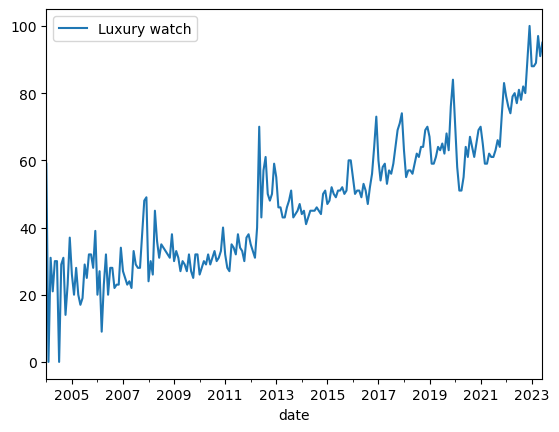

In [4]:
iot.plot()

In [5]:
# Export for interpolation
# iot.to_csv("Original Data input into R for interpolation/google_trends.csv") # Uncomment if needed

In [6]:
# Reading data with earnings call transcript
df = pd.read_excel("Data/Luxury companies sentiment.xlsx")
df.head()

,Date,Company,Event,Transcript
0,27 Jan '23,MC-FR,"Q4 2022 Earnings Call, 27-January-2023 12:00 P...","Well, good evening. I'm delighted to be with y..."
1,11 Nov '22,CFR-CH,"Q2 2023 Earnings Call, 11-November-2022 3:30 A...","Thank you, Sophie. Good morning to everyone li..."
2,20 Oct '22,KER-FR,"Q3 2022 Sales and Revenue Call, 20-October-202...",Good evening to all of you and welcome to Keri...
3,11 Oct '22,MC-FR,"Q3 2022 Sales and Revenue Call, 11-October-202...",Hello and thank you for joining us for LVMH's ...
4,26 Jul '22,MC-FR,"Q2 2022 Earnings Call, 26-July-2022 12:00 PM E...","Ladies and gentlemen, good afternoon, and welc..."


In [7]:
# Cleaning dataframe
df['Event'] = df['Event'].str.extract('(.+?),')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Transcript'] = df['Transcript'].apply(lambda x: re.sub(r'\([^)]*\)|\[[^\]]*\]', '', x))
df['Transcript'] = df['Transcript'].apply(lambda x: x.replace('\n', ''))
df

C:\Users\Hriday Govind\AppData\Local\Temp\ipykernel_20988\2507098727.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']).dt.date


,Date,Company,Event,Transcript
0,2023-01-27,MC-FR,Q4 2022 Earnings Call,"Well, good evening. I'm delighted to be with y..."
1,2022-11-11,CFR-CH,Q2 2023 Earnings Call,"Thank you, Sophie. Good morning to everyone li..."
2,2022-10-20,KER-FR,Q3 2022 Sales and Revenue Call,Good evening to all of you and welcome to Keri...
3,2022-10-11,MC-FR,Q3 2022 Sales and Revenue Call,Hello and thank you for joining us for LVMH's ...
4,2022-07-26,MC-FR,Q2 2022 Earnings Call,"Ladies and gentlemen, good afternoon, and welc..."
...,...,...,...,...
61,2017-04-25,KER-FR,Q1 2017 Sales and Revenue Call,"Good evening to all of you, and welcome to thi..."
62,2017-04-11,MC-FR,Q1 2017 Sales and Revenue Call,"Hello. I'm Chris Hollis, Director of Financial..."
63,2017-02-10,KER-FR,Q4 2016 Earnings Call,Good morning. I'm delighted to welcome you to ...
64,2017-01-26,MC-FR,Q4 2016 Earnings Call,"Ladies and gentlemen, good evening. I'm deligh..."


In [8]:
# Import VADER and TExtblo libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [9]:
# VADER and Textblob models
sid = SentimentIntensityAnalyzer()
df['Transcript'] = df['Transcript'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Sentiment Polarity Textblob'] = df['Transcript'].apply(get_polarity)
df['Sentiment Score VADER'] = df['Transcript'].apply(lambda x: sid.polarity_scores(x))
df['positive'] = df['Sentiment Score VADER'].apply(lambda score_dict: score_dict['pos'])
df['negative'] = df['Sentiment Score VADER'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['Sentiment Score VADER'].apply(lambda score_dict: score_dict['neu'])
df['compound'] = df['Sentiment Score VADER'].apply(lambda score_dict: score_dict['compound'])
df

,Date,Company,Event,Transcript,Sentiment Polarity Textblob,Sentiment Score VADER,positive,negative,neutral,compound
0,2023-01-27,MC-FR,Q4 2022 Earnings Call,"Well, good evening. I'm delighted to be with y...",0.251790,"{'neg': 0.032, 'neu': 0.766, 'pos': 0.202, 'co...",0.202,0.032,0.766,0.9999
1,2022-11-11,CFR-CH,Q2 2023 Earnings Call,"Thank you, Sophie. Good morning to everyone li...",0.158085,"{'neg': 0.018, 'neu': 0.835, 'pos': 0.147, 'co...",0.147,0.018,0.835,0.9999
2,2022-10-20,KER-FR,Q3 2022 Sales and Revenue Call,Good evening to all of you and welcome to Keri...,0.172741,"{'neg': 0.011, 'neu': 0.814, 'pos': 0.175, 'co...",0.175,0.011,0.814,0.9998
3,2022-10-11,MC-FR,Q3 2022 Sales and Revenue Call,Hello and thank you for joining us for LVMH's ...,0.229108,"{'neg': 0.008, 'neu': 0.794, 'pos': 0.197, 'co...",0.197,0.008,0.794,0.9999
4,2022-07-26,MC-FR,Q2 2022 Earnings Call,"Ladies and gentlemen, good afternoon, and welc...",0.135036,"{'neg': 0.032, 'neu': 0.812, 'pos': 0.156, 'co...",0.156,0.032,0.812,0.9997
...,...,...,...,...,...,...,...,...,...,...
61,2017-04-25,KER-FR,Q1 2017 Sales and Revenue Call,"Good evening to all of you, and welcome to thi...",0.178854,"{'neg': 0.01, 'neu': 0.78, 'pos': 0.21, 'compo...",0.210,0.010,0.780,0.9999
62,2017-04-11,MC-FR,Q1 2017 Sales and Revenue Call,"Hello. I'm Chris Hollis, Director of Financial...",0.196748,"{'neg': 0.026, 'neu': 0.79, 'pos': 0.184, 'com...",0.184,0.026,0.790,0.9999
63,2017-02-10,KER-FR,Q4 2016 Earnings Call,Good morning. I'm delighted to welcome you to ...,0.147972,"{'neg': 0.026, 'neu': 0.784, 'pos': 0.19, 'com...",0.190,0.026,0.784,1.0000
64,2017-01-26,MC-FR,Q4 2016 Earnings Call,"Ladies and gentlemen, good evening. I'm deligh...",0.144591,"{'neg': 0.049, 'neu': 0.771, 'pos': 0.18, 'com...",0.180,0.049,0.771,0.9999


In [10]:
# VADER and TextBlob statistics
df['compound'].min()

0.9913

In [11]:
df['compound'].max()

1.0

In [12]:
df['Sentiment Polarity Textblob'].min()

0.044968457468457464

In [13]:
df['Sentiment Polarity Textblob'].max()

0.25178965907624434

In [14]:
df_textblob = df[['Date', 'Sentiment Polarity Textblob']]
df_textblob

,Date,Sentiment Polarity Textblob
0,2023-01-27,0.251790
1,2022-11-11,0.158085
2,2022-10-20,0.172741
3,2022-10-11,0.229108
4,2022-07-26,0.135036
...,...,...
61,2017-04-25,0.178854
62,2017-04-11,0.196748
63,2017-02-10,0.147972
64,2017-01-26,0.144591


In [15]:
df_max = df["Sentiment Polarity Textblob"] == df['Sentiment Polarity Textblob'].max()
df_min = df["Sentiment Polarity Textblob"] == df['Sentiment Polarity Textblob'].min()
df[df_min]

,Date,Company,Event,Transcript,Sentiment Polarity Textblob,Sentiment Score VADER,positive,negative,neutral,compound
29,2020-02-26,RMS-FR,Q4 2019 Earnings Call,"Good morning, everyone. I'll begin by recallin...",0.044968,"{'neg': 0.031, 'neu': 0.873, 'pos': 0.097, 'co...",0.097,0.031,0.873,0.9961


In [16]:
df_test = df.iloc[0:1]
df_test

,Date,Company,Event,Transcript,Sentiment Polarity Textblob,Sentiment Score VADER,positive,negative,neutral,compound
0,2023-01-27,MC-FR,Q4 2022 Earnings Call,"Well, good evening. I'm delighted to be with y...",0.25179,"{'neg': 0.032, 'neu': 0.766, 'pos': 0.202, 'co...",0.202,0.032,0.766,0.9999


In [17]:
#### BERT Model that did not end up working due to memory issues

# from transformers import BertTokenizer, BertForSequenceClassification
# import torch

In [18]:
# tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
# model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

In [19]:
# def sentiment_score(review):
#     tokens = tokenizer.encode(review, return_tensors = "pt")
#     result = model(tokens)
#     return result

In [20]:
# sentiment_score(df['Transcript'][0])

In [21]:
###### ATTEMPT TO SPLIT THE TEXT AND RUN ON EACH SECTION (FAILED)

# def get_sentiment(tokens):
#     outputs = model(**tokens)
#     probabilities = torch.nn.functional.softmax(outputs[0], dim=-1 )
#     return probabilities
# def chunk_text_to_window_size_and_predict_proba(input_ids, attention_mask, total_len):
#     """
#     This function splits the given input text into chunks of a specified window length, 
#     applies transformer model to each chunk and computes probabilities of each class for each chunk. 
#     The computed probabilities are then appended to a list.

#     Args:
#         input_ids (List[int]): List of token ids representing the input text.
#         attention_mask (List[int]): List of attention masks corresponding to input_ids.
#         total_len (int): Total length of the input_ids.

#     Returns:
#         proba_list (List[torch.Tensor]): List of probability tensors for each chunk.
#     """
#     proba_list = []
    
#     start = 0
#     window_length = 200
    
#     loop = True

#     while loop:
#         end = start  + window_length
#         # If the end index exceeds total length, set the flag to False and adjust the end index
#         if end >= total_len:
#             loop = False
#             end = total_len

#         # 1 => Define the text chunk
#         input_ids_chunk = input_ids[start : end]
#         attention_mask_chunk = attention_mask[start : end]
        
#         # 2 => Append [CLS] and [SEP]
#         input_ids_chunk = [101] + input_ids_chunk + [102]
#         attention_mask_chunk = [1] + attention_mask_chunk + [1]
        
#         #3 Convert regular python list to Pytorch Tensor
#         input_dict = {
#             'input_ids' : torch.Tensor([input_ids_chunk]).long(),
#             'attention_mask' : torch.Tensor([attention_mask_chunk]).int()
#         }
        
#         outputs = model(**input_dict)
        
#         probabilities = torch.nn.functional.softmax(outputs[0], dim = -1)
#         proba_list.append(probabilities)
        

# def get_mean_from_proba(proba_list):
#     """
#     This function computes the mean probabilities of class predictions over all the chunks.

#     Args:
#         proba_list (List[torch.Tensor]): List of probability tensors for each chunk.

#     Returns:
#         mean (torch.Tensor): Mean of the probabilities across all chunks.
#     """
    
#     # Ensures that gradients are not computed, saving memory
#     with torch.no_grad():
#         # Stack the list of tensors into a single tensor
#         stacks = torch.stack(proba_list)

#         # Resize the tensor to match the dimensions needed for mean computation
#         stacks = stacks.resize(stacks.shape[0], stacks.shape[2])

#         # Compute the mean along the zeroth dimension (i.e., the chunk dimension)
#         mean = stacks.mean(dim = 0)
        
#     return mean

# def analyze_text(text):
#     tokens = tokenizer.encode_plus(text, add_special_tokens=False)
#     input_ids = tokens['input_ids']
#     attention_mask = tokens['attention_mask']
#     total_len = len(input_ids)
#     proba_list = chunk_text_to_window_size_and_predict_proba(input_ids, attention_mask, total_len )
#     mean = get_mean_from_proba(proba_list)
#     return mean

# df['sentiment_scores'] = df['Transcript'].apply(analyze_text)

# Topic Modelling

In [22]:
# Convert text to lowercase
df['Transcript'] = df['Transcript'].map(lambda x: x.lower())

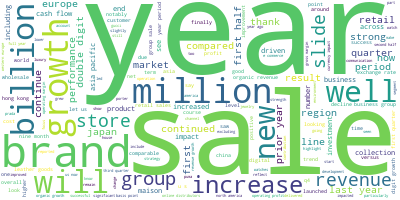

In [23]:
# Wordcloud for most common topics
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Transcript'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [24]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.Transcript.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to C:\Users\Hriday
[nltk_data]     Govind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['well', 'good', 'evening', 'delighted', 'think', 'two', 'years', 'mr', 'guiony', 'present', 'perhaps', 'zoom', 'perhaps', 'meant', 'work', 'well', 'good', 'least', 'pleased', 'evening', 'announce', 'say', 'risk', 'tiring', 'record', 'results', 'group', 'lvmh', 'saw', 'chart']


In [25]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 2), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 2), (29, 7)]


In [26]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"sales" + 0.012*"year" + 0.011*"growth" + 0.008*"new" + 0.007*"group" '
  '+ 0.007*"first" + 0.006*"well" + 0.006*"million" + 0.005*"operating" + '
  '0.005*"strong"'),
 (1,
  '0.014*"year" + 0.010*"growth" + 0.010*"sales" + 0.008*"new" + '
  '0.007*"strong" + 0.006*"retail" + 0.006*"million" + 0.006*"revenue" + '
  '0.005*"also" + 0.005*"first"'),
 (2,
  '0.015*"year" + 0.012*"sales" + 0.010*"growth" + 0.010*"group" + '
  '0.008*"first" + 0.007*"million" + 0.007*"revenue" + 0.007*"well" + '
  '0.006*"period" + 0.006*"billion"'),
 (3,
  '0.017*"year" + 0.012*"revenue" + 0.011*"growth" + 0.010*"sales" + '
  '0.009*"first" + 0.008*"million" + 0.007*"group" + 0.007*"strong" + '
  '0.007*"billion" + 0.006*"well"'),
 (4,
  '0.015*"year" + 0.008*"sales" + 0.008*"growth" + 0.007*"revenue" + '
  '0.007*"billion" + 0.006*"million" + 0.005*"good" + 0.005*"net" + '
  '0.005*"group" + 0.005*"operating"'),
 (5,
  '0.015*"year" + 0.013*"sales" + 0.011*"growth" + 0.008*"new" + '
  '0.00

In [27]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join("/Users/Hriday Govind/Documents/MSc/Thesis Final Submission/"+str(num_topics)) # Replace wiith own path
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, "/Users/Hriday Govind/Documents/MSc/Thesis Final Submission/"+ str(num_topics) +'.html') # Replace wiith own path
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.006412 -0.002267       1        1  59.202805
3      0.005846  0.006344       2        1  17.326793
5      0.002561 -0.001138       3        1  14.239226
8      0.002671 -0.002236       4        1   3.092235
4     -0.009781  0.002053       5        1   3.081418
1     -0.001319  0.000966       6        1   1.117942
6     -0.000583 -0.001587       7        1   0.858967
0     -0.005757  0.000277       8        1   0.526962
2      0.001455  0.001594       9        1   0.516659
7     -0.001505 -0.004005      10        1   0.036992, topic_info=         Term         Freq        Total Category  logprob  loglift
637      year  1755.000000  1755.000000  Default  30.0000  30.0000
496     sales  1371.000000  1371.000000  Default  29.0000  29.0000
264    growth  1235.000000  1235.000000  Default  28.0000  28.0000
261     group   688.000000   688.000000  Default  27.0000  27.0000
490   revenue   773.000000   773.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
403   organic     0.107921   302.499771  Topic10  -5.7815  -0.0362
283    impact     0.112850   349.348922  Topic10  -5.7368  -0.1356
595        us     0.107311   388.672940  Topic10  -5.7871  -0.2925
1057   online     0.105173   355.096945  Topic10  -5.8073  -0.2223
387       net     0.105630   396.543544  Topic10  -5.8029  -0.3284

[911 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.517757   able
1         2  0.186393   able
1         3  0.227813   able
1         4  0.041421   able
1         5  0.020710   able
...     ...       ...    ...
638       9  0.007244  years
639       1  0.592962  young
639       2  0.197654  young
639       3  0.098827  young
639       5  0.098827  young

[2005 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 6, 9, 5, 2, 7, 1, 3, 8])